In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.special import factorial

random_generator = np.random.default_rng()
sns.set(font_scale=1.7, rc={'text.usetex' : True})
sns.set_style(style="whitegrid")

In [27]:
I_0_list = np.linspace(1000, 10000, 30, endpoint=True)
# I_0_list = [1000, 5000, 10000]

data_list = list()
means_list = list()
expectation_list = list()
stddev_list = list()
variance_list = list()

mu_integral = 1

for I_0 in I_0_list:
    data = random_generator.poisson(I_0 * np.exp(-mu_integral), 1000000)
    data = -np.log(data / I_0)
    data_list.append(data)
    means_list.append(data.mean())
    stddev_list.append(data.std())
    variance_list.append(data.var())

In [23]:
np.allclose(np.sqrt(variance_list), stddev_list)

True

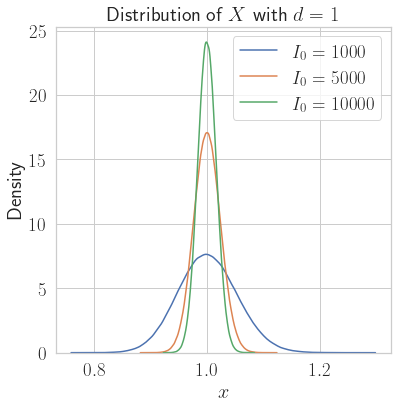

In [26]:
plt.figure(figsize=(6, 6))

for i in range(len(I_0_list)):
    sns.kdeplot(data_list[i], label=f"$I_0 = {I_0_list[i]}$").set(
        title="Distribution of $X$ with $d = 1$")

    # Normal distribution with same mean and stddev
    # plt.plot(xs, norm.pdf(xs, loc=mean_low, scale=stddev_low), 'k-', lw=0.8)

plt.xlabel("$x$")
plt.legend()
plt.savefig('poisson-data.png')

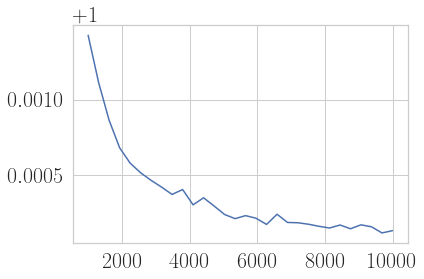

In [19]:
plt.plot(I_0_list, means_list)

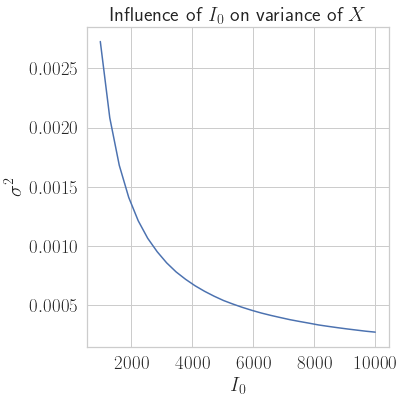

In [33]:
plt.figure(figsize=(6, 6))
plt.plot(I_0_list, variance_list)

plt.title('Influence of $I_0$ on variance of $X$')
plt.xlabel("$I_0$")
plt.ylabel("$\sigma^2$")

plt.tight_layout()
plt.savefig('I0-variance-plot.png')